In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
import glob
import zipfile


def plot_dataset_distribution(dataset_path, dataset_name="Dataset"):
    class_counts = {}

    for class_dir in sorted(os.listdir(dataset_path)):
        class_path = os.path.join(dataset_path, class_dir)
        if os.path.isdir(class_path):
            image_count = len([
                fname for fname in os.listdir(class_path)
                if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.ppm'))
            ])
            class_counts[class_dir] = image_count

    plt.figure(figsize=(12, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xlabel("Клас")
    plt.ylabel("Кількість зображень")
    plt.title(f"Розподіл зображень по класах у {dataset_name}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

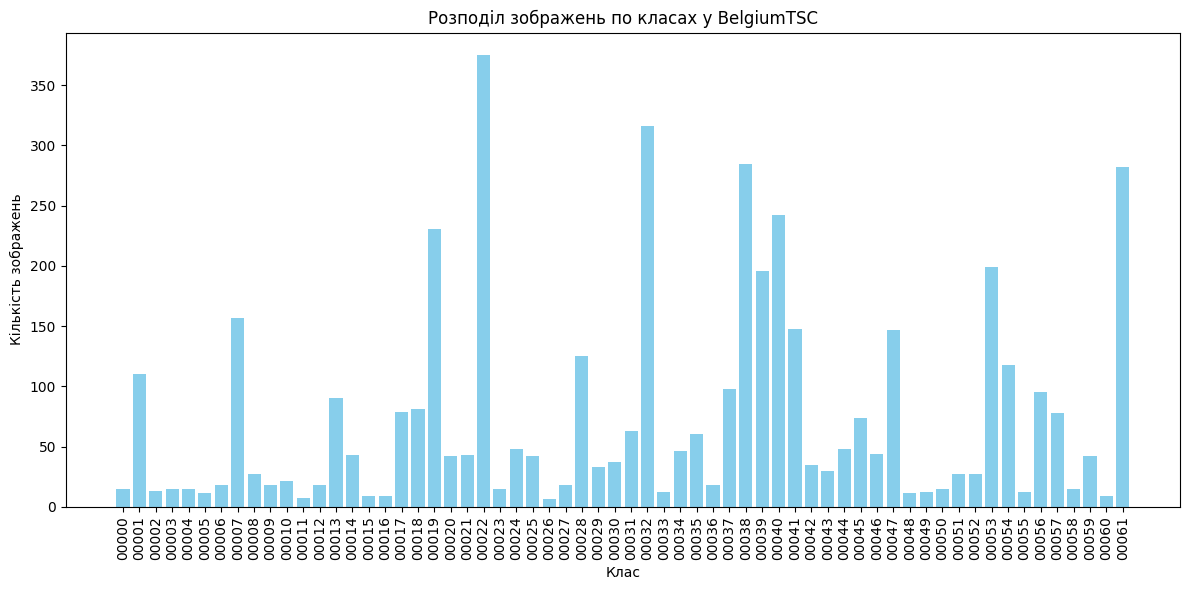

In [12]:
cwd = os.getcwd() + "/content"
# with zipfile.ZipFile(cwd + "/content/BelgiumTSC_Testing.zip", 'r') as zip_ref:
    #zip_ref.extractall(cwd + "/content/Testing")

#with zipfile.ZipFile(cwd + "/content/BelgiumTSC_Training.zip", 'r') as zip_ref:
    #zip_ref.extractall(cwd + "/content/Training")
    
img_height, img_width = 64, 64
batch_size = 32
train_dir = cwd + "/Training/Training"
test_dir = cwd + "/Testing/Testing"

for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith(".ppm"):
            ppm_path = os.path.join(root, file)
            png_path = os.path.splitext(ppm_path)[0] + ".png"
            with Image.open(ppm_path) as img:
                img.save(png_path)

for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".ppm"):
            ppm_path = os.path.join(root, file)
            png_path = os.path.splitext(ppm_path)[0] + ".png"
            with Image.open(ppm_path) as img:
                img.save(png_path)

for ppm_file in glob.glob(f"{train_dir}/**/*.ppm", recursive=True):
    os.remove(ppm_file)

for ppm_file in glob.glob(f"{test_dir}/**/*.ppm", recursive=True):
    os.remove(ppm_file)

plot_dataset_distribution(train_dir, "BelgiumTSC")

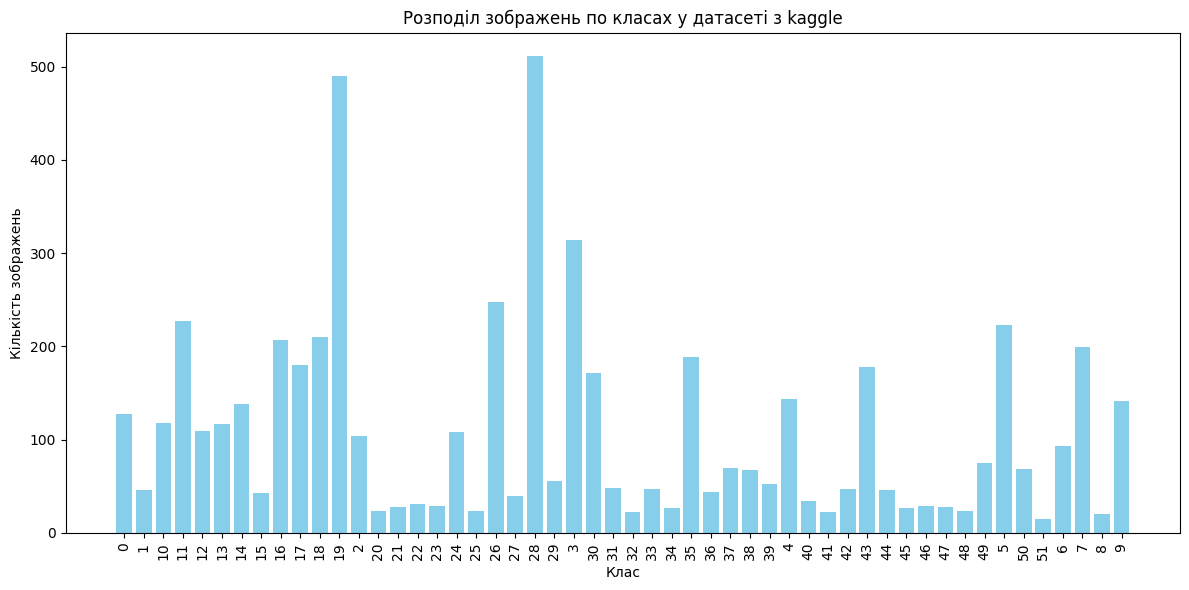

In [13]:
cwd = os.getcwd() + "/kaggle"
img_height, img_width = 64, 64
batch_size = 32
train_dir = cwd + "/DATA"
test_dir = cwd + "/TEST"
plot_dataset_distribution(train_dir, "датасеті з kaggle")

In [37]:
import pandas as pd

df = pd.read_csv('german/test.csv', delimiter='\t')
print(df.columns)
print(df.head())

Index(['Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path'], dtype='object')
  Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0                  53,54,6,5,48,49,16,Test/00000.png   
1                   42,45,5,5,36,40,1,Test/00001.png   
2                  48,52,6,6,43,47,38,Test/00002.png   
3                  27,29,5,5,22,24,33,Test/00003.png   
4                  60,57,5,5,55,52,11,Test/00004.png   


<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:7: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:7: SyntaxWarning: invalid escape sequence '\T'
C:\Users\flundre\AppData\Local\Temp\ipykernel_30660\2482147131.py:3: SyntaxWarning: invalid escape sequence '\g'
  cwd = os.getcwd() + "\german"
C:\Users\flundre\AppData\Local\Temp\ipykernel_30660\2482147131.py:6: SyntaxWarning: invalid escape sequence '\T'
  train_dir = cwd + "\Train"
C:\Users\flundre\AppData\Local\Temp\ipykernel_30660\2482147131.py:7: SyntaxWarning: invalid escape sequence '\T'
  test_dir = cwd + "\Test"


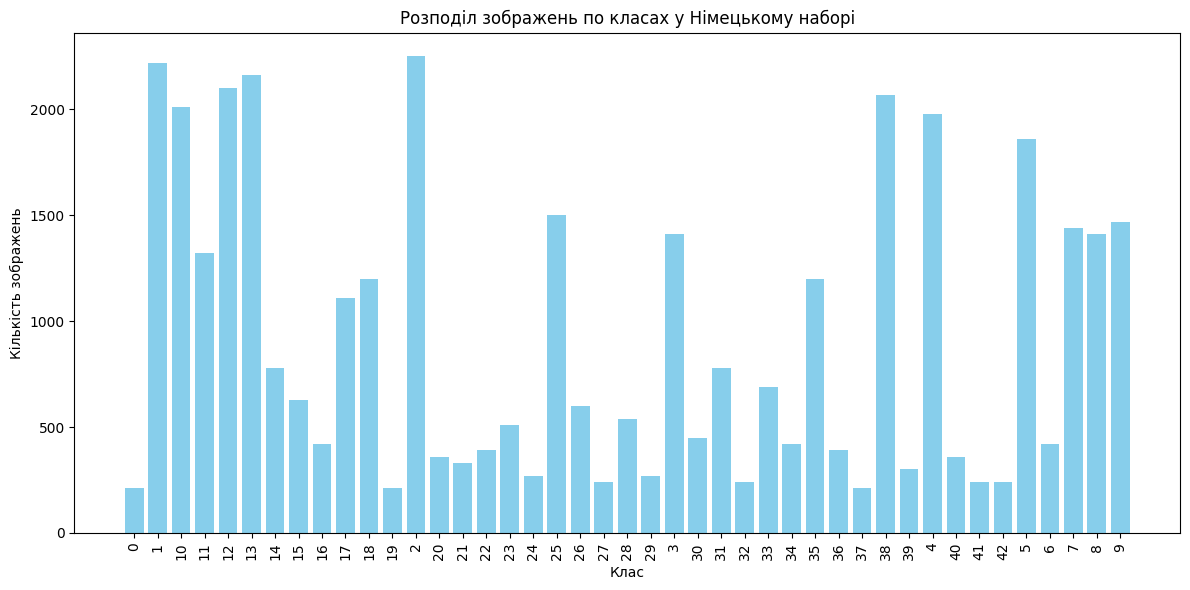

In [38]:
import shutil

cwd = os.getcwd() + "\german"
img_height, img_width = 64, 64
batch_size = 32
train_dir = cwd + "\Train"
test_dir = cwd + "\Test"
plot_dataset_distribution(train_dir, "Німецькому наборі")

base_dir = 'german'
test_dir = os.path.join(base_dir, 'test')
csv_path = os.path.join(base_dir, 'test.csv')
sorted_dir = os.path.join(test_dir, 'sorted')

# Створюємо папку sorted, якщо її нема
os.makedirs(sorted_dir, exist_ok=True)

# Читаємо CSV
df = pd.read_csv(csv_path, delimiter=',')

# Проходимося по рядках CSV
for _, row in df.iterrows():
    class_id = str(row['ClassId'])
    image_path = os.path.join(test_dir, os.path.basename(row['Path']))  # назва зображення
    
    # Папка для класу
    class_dir = os.path.join(sorted_dir, class_id)
    os.makedirs(class_dir, exist_ok=True)
    
    # Копіюємо зображення
    if os.path.exists(image_path):
        shutil.copy(image_path, class_dir)
    else:
        print(f"Не знайдено файл: {image_path}")

In [22]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.


In [23]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [24]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names, num_classes)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9'] 43


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 688,747 (2.63 MB)

 Trainable params: 688,747 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
history = model.fit(train_ds, validation_data=val_ds, epochs=15, callbacks=callbacks)

Epoch 1/15


981/981 ━━━━━━━━━━━━━━━━━━━━ 67s 64ms/step - accuracy: 0.3506 - loss: 2.3951 - val_accuracy: 0.9219 - val_loss: 0.3179
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 63s 64ms/step - accuracy: 0.8252 - loss: 0.5468 - val_accuracy: 0.9779 - val_loss: 0.0989
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 64s 66ms/step - accuracy: 0.9094 - loss: 0.2901 - val_accuracy: 0.9847 - val_loss: 0.0649
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 73s 75ms/step - accuracy: 0.9380 - loss: 0.1945 - val_accuracy: 0.9904 - val_loss: 0.0485
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.9548 - loss: 0.1399 - val_accuracy: 0.9904 - val_loss: 0.0499
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 63s 64ms/step - accuracy: 0.9633 - loss: 0.1153 - val_accuracy: 0.9929 - val_loss: 0.0390
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 65s 66ms/step - accuracy: 0.9704 - loss: 0.0906 - val_accuracy: 0.9935 - val_loss: 0.0262
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.9742 - loss: 0.0819 - val_accurac

In [7]:
model.save('traffic_sign_model.keras')

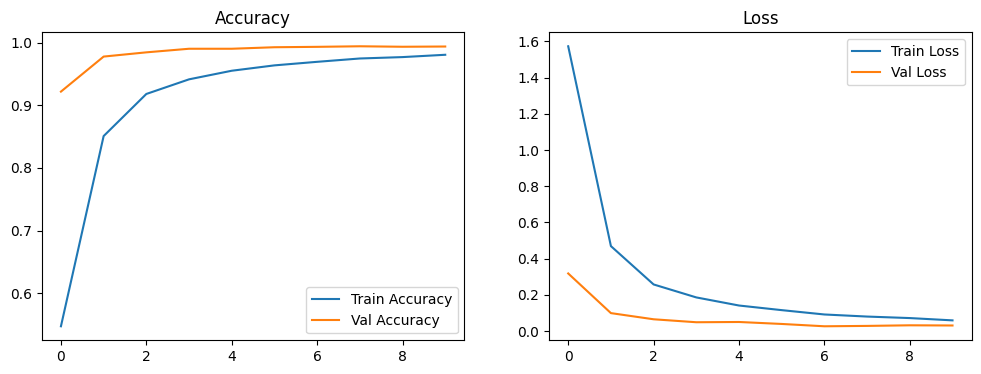

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

Found 12630 files belonging to 1 classes.
395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step
Точність на тестовому наборі: 0.9993665874901029


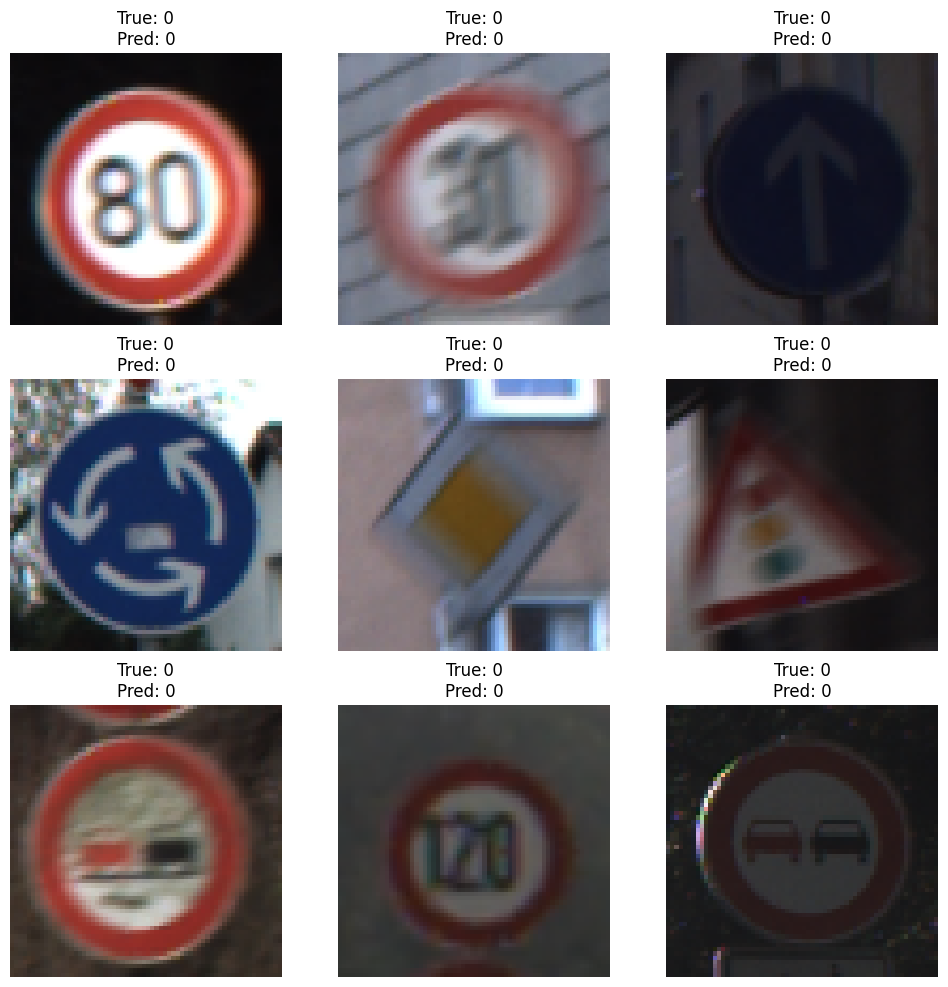

IndexError: list index out of range

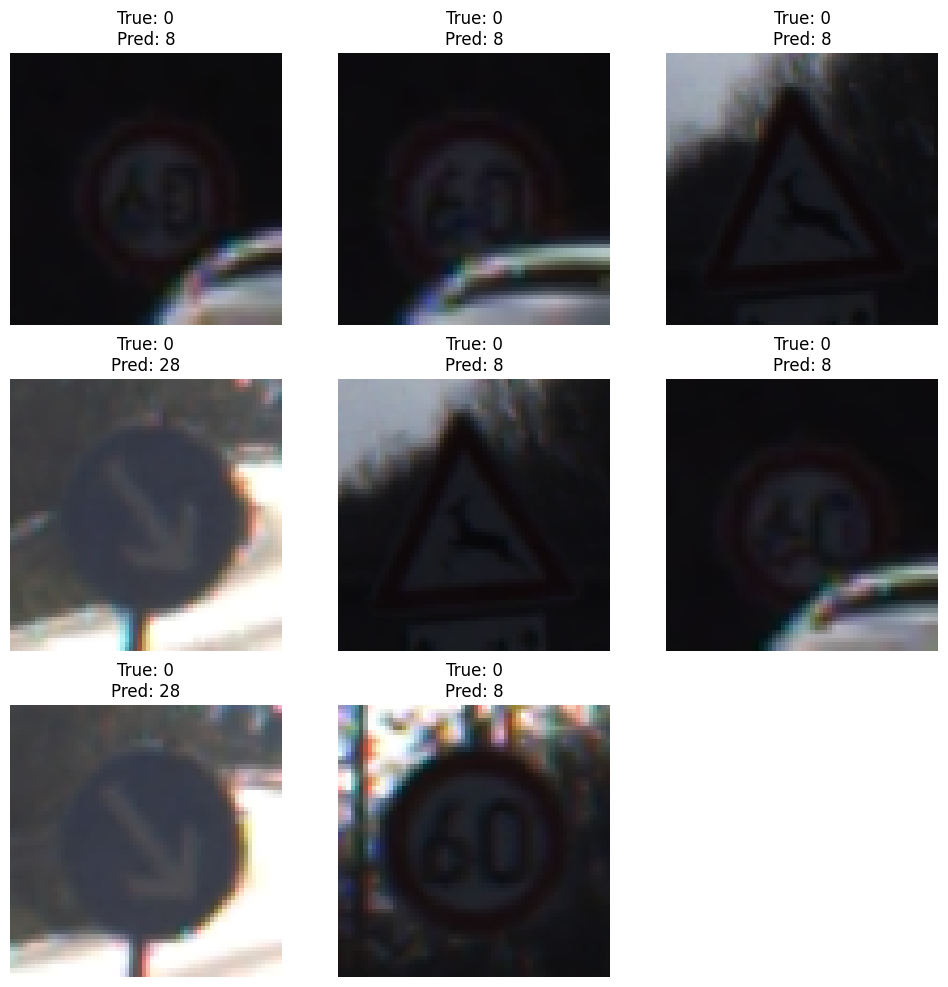

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_images, test_labels = [], []
for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

pred_probs = model.predict(test_images)
pred_indices = np.argmax(pred_probs, axis=1)
pred_labels = [class_names[i] for i in pred_indices]
true_labels = [class_names[i] for i in test_labels]

acc = accuracy_score(true_labels, pred_labels)
print("Точність на тестовому наборі:", acc)

plt.figure(figsize=(12, 12))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i] / 255.0)
    plt.title(f"True: {true_labels[i]}\nPred: {pred_labels[i]}")
    plt.axis("off")
plt.show()

errors = [(i, t, p) for i, (t, p) in enumerate(zip(true_labels, pred_labels)) if t != p]
plt.figure(figsize=(12, 12))
for i in range(9):
    idx, t, p = errors[i]
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx] / 255.0)
    plt.title(f"True: {t}\nPred: {p}")
    plt.axis("off")
plt.show()

In [40]:
from tensorflow.keras.models import load_model
import os
model = load_model('traffic_sign_model.keras')
cwd = os.getcwd()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


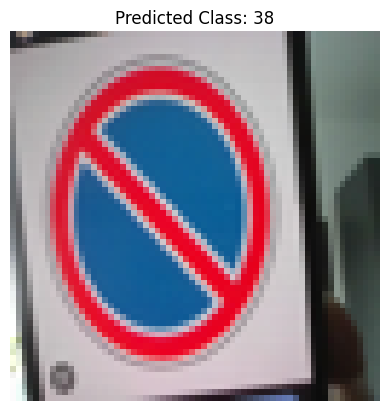

Predicted Class: 38


In [ ]:
def predict_image(image_path):
    img = Image.open(image_path)

    if img.mode != 'RGB':
        img = img.convert('RGB')

    img_resized = img.resize((img_width, img_height))

    img_array = np.array(img_resized)

    img_array = np.expand_dims(img_array, axis=0)

    pred_probs = model.predict(img_array)
    pred_index = np.argmax(pred_probs, axis=1)
    pred_class = class_names[pred_index[0]]

    plt.imshow(img_resized)
    plt.title(f"Predicted Class: {pred_class}")
    plt.axis('off')
    plt.show()

    return pred_class

image_path = cwd + "/content/test_image3.png"
print(f"Predicted Class: {predict_image(image_path)}")